In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file from Kaggle input
df = pd.read_excel("/kaggle/input/data-cleaned-climate-data/Data_Cleaned_climate_data.xlsx")

# Check data
df.head(15)

,Year,Rainfall_mm,Avg_Temperature_C
0,2010,525.95,27.72
1,2011,1041.36,26.09
2,2012,1047.38,26.01
3,2013,1199.37,25.62
4,2014,723.43,26.57
5,2015,683.08,27.22
6,2016,1069.25,26.67
7,2017,785.13,27.03
8,2018,793.60,27.07
9,2019,1110.47,26.30


# Rainfall Trend Graph 

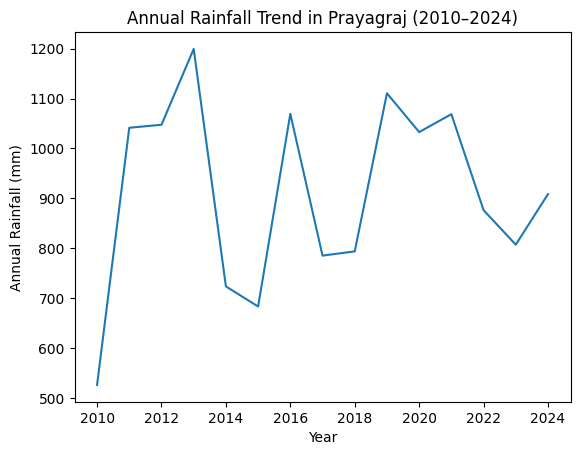

In [8]:
plt.figure()
plt.plot(df["Year"], df["Rainfall_mm"])
plt.xlabel("Year")
plt.ylabel("Annual Rainfall (mm)")
plt.title("Annual Rainfall Trend in Prayagraj (2010–2024)")
plt.show()

# Temperature Trend Graph#

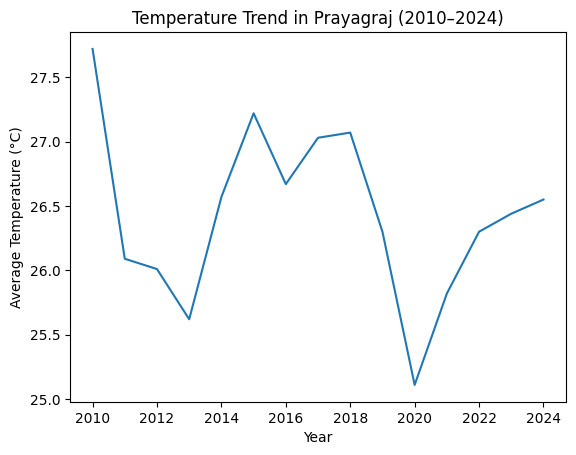

In [9]:
plt.figure()
plt.plot(df["Year"], df["Avg_Temperature_C"])
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Temperature Trend in Prayagraj (2010–2024)")
plt.show()

In [10]:
df.describe()

,Year,Rainfall_mm,Avg_Temperature_C
count,15.000000,15.000000,15.000000
mean,2017.000000,911.459333,26.434667
std,4.472136,189.032315,0.667916
min,2010.000000,525.950000,25.110000
25%,2013.500000,789.365000,26.050000
50%,2017.000000,908.330000,26.440000
75%,2020.500000,1057.980000,26.850000
max,2024.000000,1199.370000,27.720000


# Climate Risk Classification

In [11]:
df["Climate_Risk"] = df.apply(
    lambda x: "High Risk"
    if (x["Rainfall_mm"] < df["Rainfall_mm"].mean() and
        x["Avg_Temperature_C"] > df["Avg_Temperature_C"].mean())
    else "Moderate Risk",
    axis=1
)

df[["Year", "Climate_Risk"]]

,Year,Climate_Risk
0,2010,High Risk
1,2011,Moderate Risk
2,2012,Moderate Risk
3,2013,Moderate Risk
4,2014,High Risk
5,2015,High Risk
6,2016,Moderate Risk
7,2017,High Risk
8,2018,High Risk
9,2019,Moderate Risk


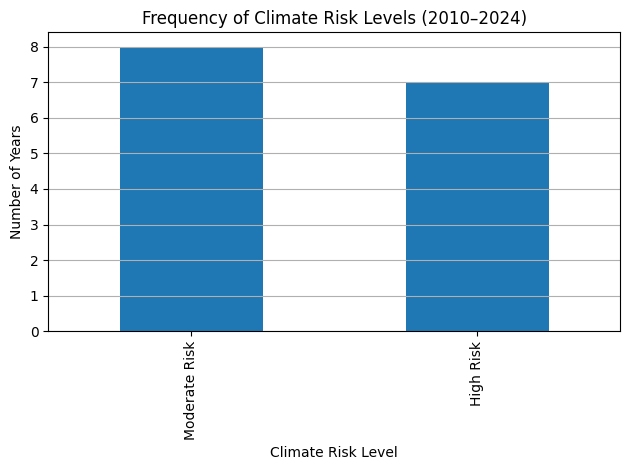

In [18]:
ax = df["Climate_Risk"].value_counts().plot(kind="bar")

plt.xlabel("Climate Risk Level")
plt.ylabel("Number of Years")
plt.title("Frequency of Climate Risk Levels (2010–2024)")
plt.grid(axis="y")

plt.tight_layout()
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression()

# Train model
model.fit(X_train, y_train)

print("Model training completed")


Model training completed


In [25]:
y_pred = model.predict(X_test)

print("Predicted values:", y_pred)
print("Actual values:   ", y_test)


Predicted values: [1 1 0 0 0]
Actual values:    [1 1 0 0 0]


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Confusion Matrix:
[[3 0]
 [0 2]]


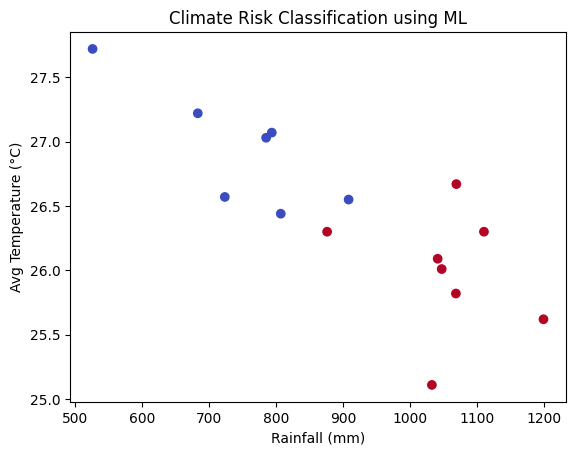

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X["Rainfall_mm"], X["Avg_Temperature_C"], c=y_encoded, cmap="coolwarm")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Avg Temperature (°C)")
plt.title("Climate Risk Classification using ML")
plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

print("Random Forest trained successfully")


Random Forest trained successfully


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Confusion Matrix:
 [[3 0]
 [0 2]]


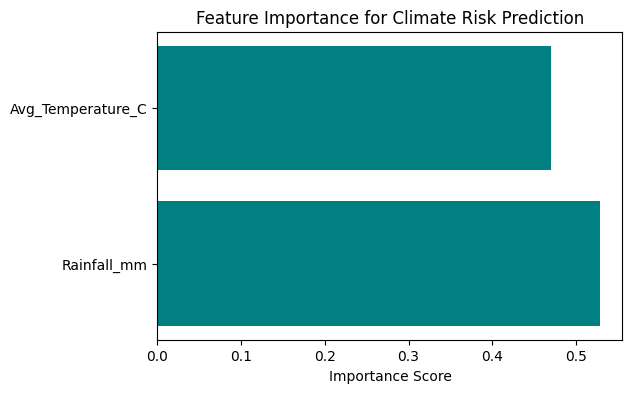

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(6,4))
plt.barh(features, importance, color="teal")
plt.xlabel("Importance Score")
plt.title("Feature Importance for Climate Risk Prediction")
plt.show()
